<div style="background-color: lightblue;border: 1px solid black; padding: 10px">

### Project by:
    
**Meghavi Singhaniya (ms89872)**  
**Vaibhav Nagar**  
**Pratyush Sharma**  
**Shrishti**  
**Mayank Gupta**
</div>


<div style="background-color: lightgray; padding: 10px;">
    
**Mood based recommender**
    
</div>

In [2]:
#Basic
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Clsutering and Recommendations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
df = pd.read_csv('genres.csv')
df.head()

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/1852617067.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

<div style="background-color: lightgray; padding: 10px;">

**Data Cleaning**   

</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [6]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [7]:
#dropping rows with no song names and no uri

df= df[df['song_name'].isnull() == False]
df= df[df['uri'].isnull() == False]

<div style="background-color: lightgray; padding: 10px;">

**EDA**

</div>

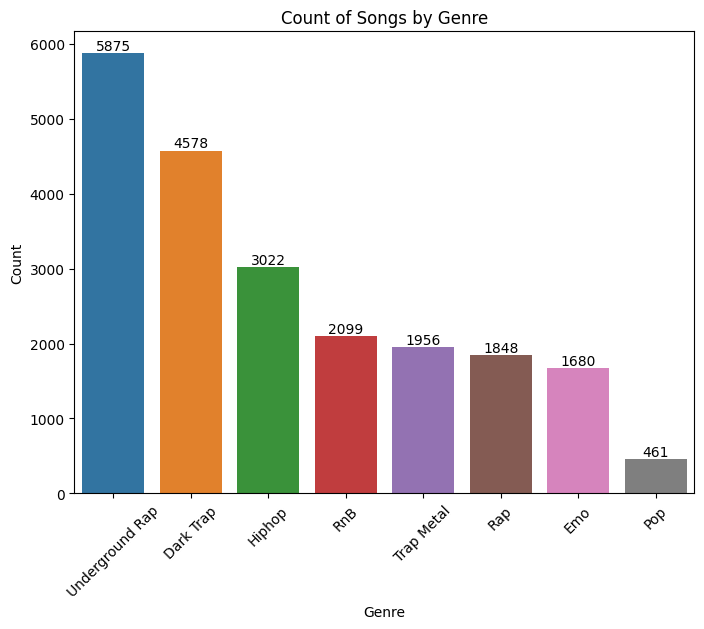

In [8]:
# Create a count plot for the 'genre' column with count labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)

# Annotate each bar with its count
for idx, count in enumerate(df['genre'].value_counts()):
    plt.text(idx, count, str(count), ha='center', va='bottom')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [9]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='valence', y='energy', z='genre', color='genre')
fig.update_layout(title='3D Scatter Plot of Tempo, Loudness, and Genre', scene=dict(zaxis=dict(showticklabels=False)))
fig.show()

In [10]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live
21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,188.760,spotify:track:2kpwzDrLK5KoIk1S5wftX7,Hiphop,Can't Hold On


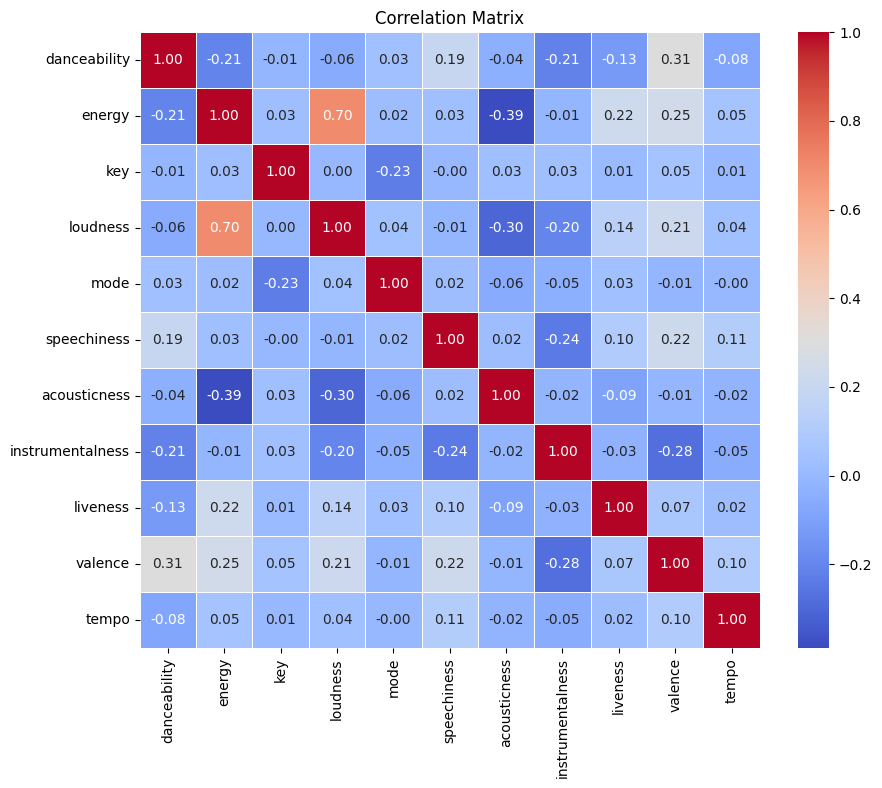

In [11]:
# Selecting only numeric columns from the DataFrame
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [12]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21519 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21519 non-null  float64
 1   energy            21519 non-null  float64
 2   key               21519 non-null  int64  
 3   loudness          21519 non-null  float64
 4   mode              21519 non-null  int64  
 5   speechiness       21519 non-null  float64
 6   acousticness      21519 non-null  float64
 7   instrumentalness  21519 non-null  float64
 8   liveness          21519 non-null  float64
 9   valence           21519 non-null  float64
 10  tempo             21519 non-null  float64
 11  uri               21519 non-null  object 
 12  genre             21519 non-null  object 
 13  song_name         21519 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.5+ MB


<div style="background-color: lightgray; padding: 10px;">

**K means Technique**

</div>

In [13]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df


/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/3586040230.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,spotify:track:2kpwzDrLK5KoIk1S5wftX7,Hiphop,Can't Hold On


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/1077575442.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



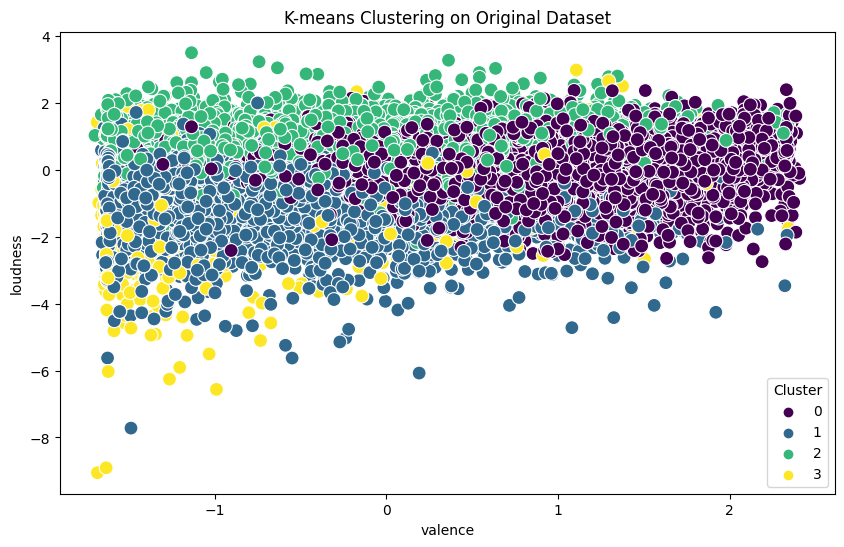

In [14]:
#  K-Means Clustering without PCA

X = filtered_df.drop(['uri','genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()


<div style="background-color: lightgray; padding: 10px;">

**Clustering with PCA & Kmeans**

</div>

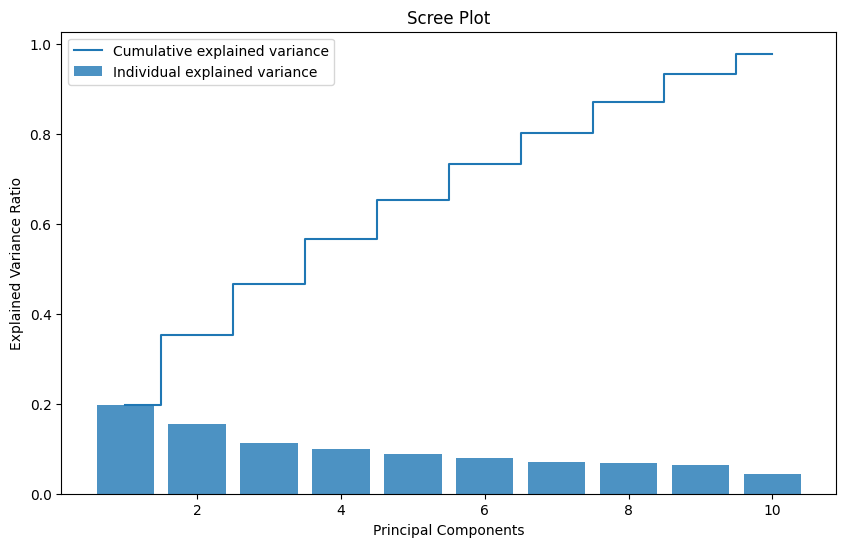

In [15]:
# Perform PCA
n_components = 10  # Set a higher value initially
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


In [16]:
# 4. Perform PCA
n_components = 4  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[-0.73494078, -1.1901496 , -1.25668809, -0.03860909],
       [ 1.59169592,  0.11624144, -0.33825405, -0.88627838],
       [-1.46581368,  0.81146792, -0.72329146,  1.02016378],
       ...,
       [-0.56542546, -1.03473929, -0.23710214,  0.20783954],
       [-1.17334064, -0.86639203,  0.77741616,  0.24654526],
       [-1.34619528, -0.85375207,  0.63141257, -0.22744275]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/92538273.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



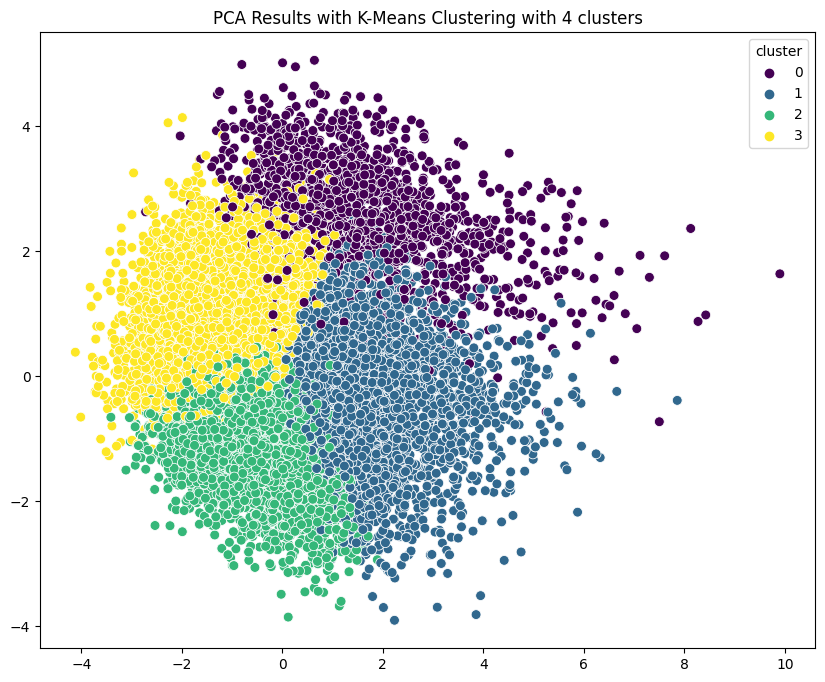

In [17]:
# 5. K-Means Clustering on PCA Results
n_clusters = 4 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [18]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,2
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,2
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,spotify:track:2kpwzDrLK5KoIk1S5wftX7,Hiphop,Can't Hold On,2


<div style="background-color: lightgray; padding: 10px;">

**EDA on clusters and assigning them moods**

</div>

In [19]:
filtered_df_pca['cluster'].value_counts()

cluster
2    7692
1    6055
3    6032
0    1740
Name: count, dtype: int64

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


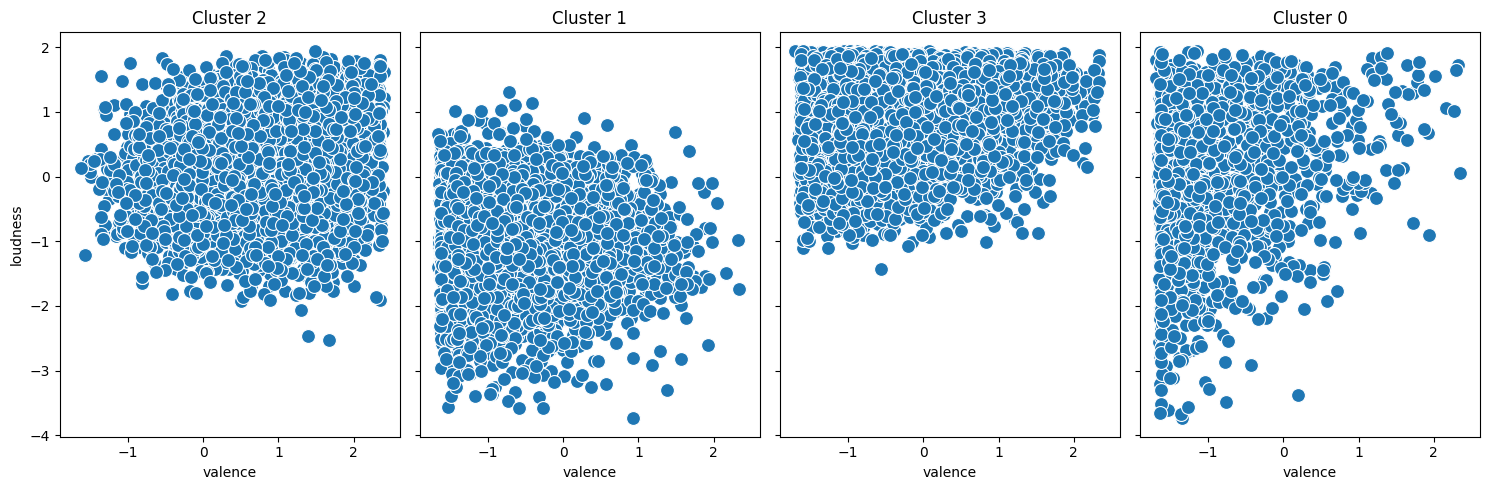

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()


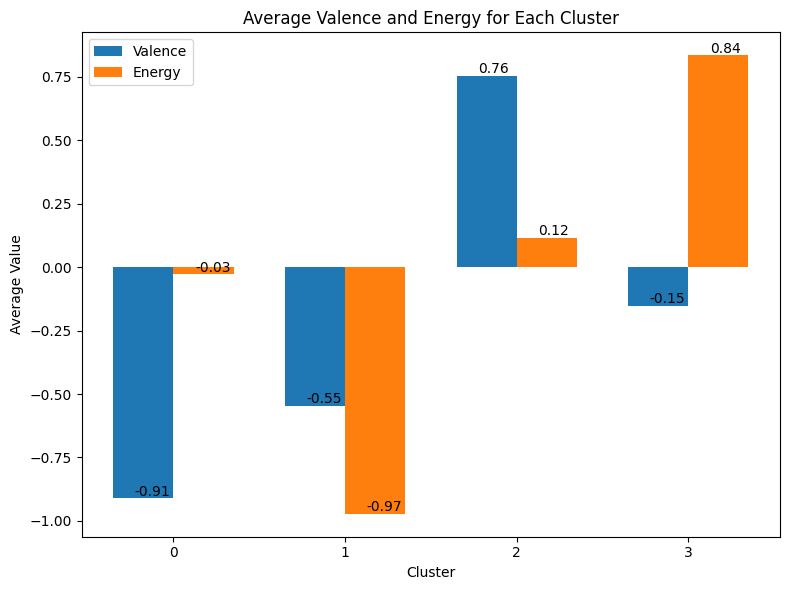

In [21]:
# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Plotting the average 'valence' and 'energy' for each cluster in vertical bars
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = cluster_means['cluster']

plt.bar(index, cluster_means['valence'], bar_width, label='Valence')
plt.bar(index + bar_width, cluster_means['energy'], bar_width, label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.05, valence + 0.01, f'{valence:.2f}', color='black')
    plt.text(i + bar_width - 0.05, energy + 0.01, f'{energy:.2f}', color='black')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index + bar_width / 2, cluster_means['cluster'])
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
#Label each cluster with specific mood

filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Sad', np.nan)
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Calm', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Happy', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Angry', filtered_df_pca['mood'])

filtered_df_pca

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/3727093184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/3727093184.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/13/ywy2cpc949v555dmk1qfp4j40000gn/T/ipykernel_41240/3727093184.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,2,Happy
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1,Calm
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3,Angry
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Angry
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,2,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3,Angry
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1,Calm
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,2,Happy
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,spotify:track:2kpwzDrLK5KoIk1S5wftX7,Hiphop,Can't Hold On,2,Happy


<div style="background-color: lightgray; padding: 10px;">

**EDA on the moods**

</div>

<div style="background-color: lightgray; padding: 10px;">

**1. Number of songs assigned to each mood**

</div>

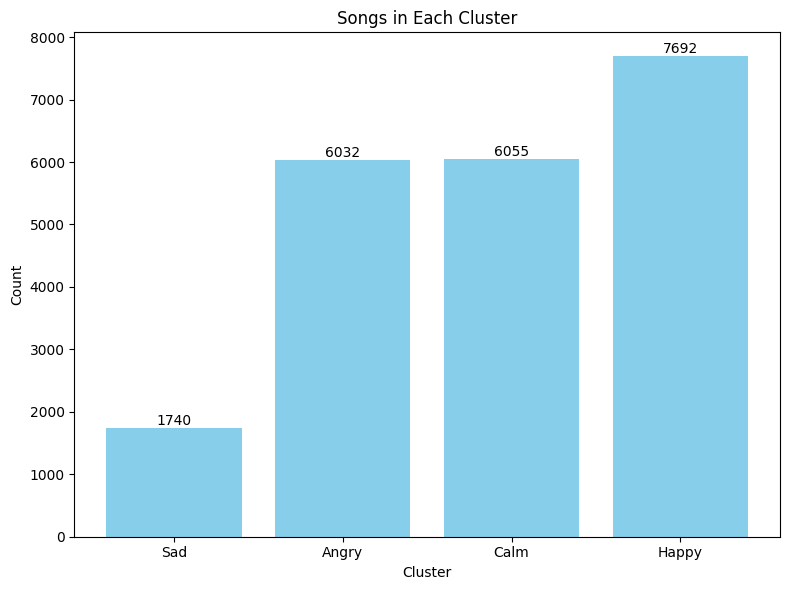

In [23]:
# Get value counts of each unique value in 'cluster' column
cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

plt.title('Songs in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Display count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 10px;">

**2. Count of songs of all genres in each mood**

</div>

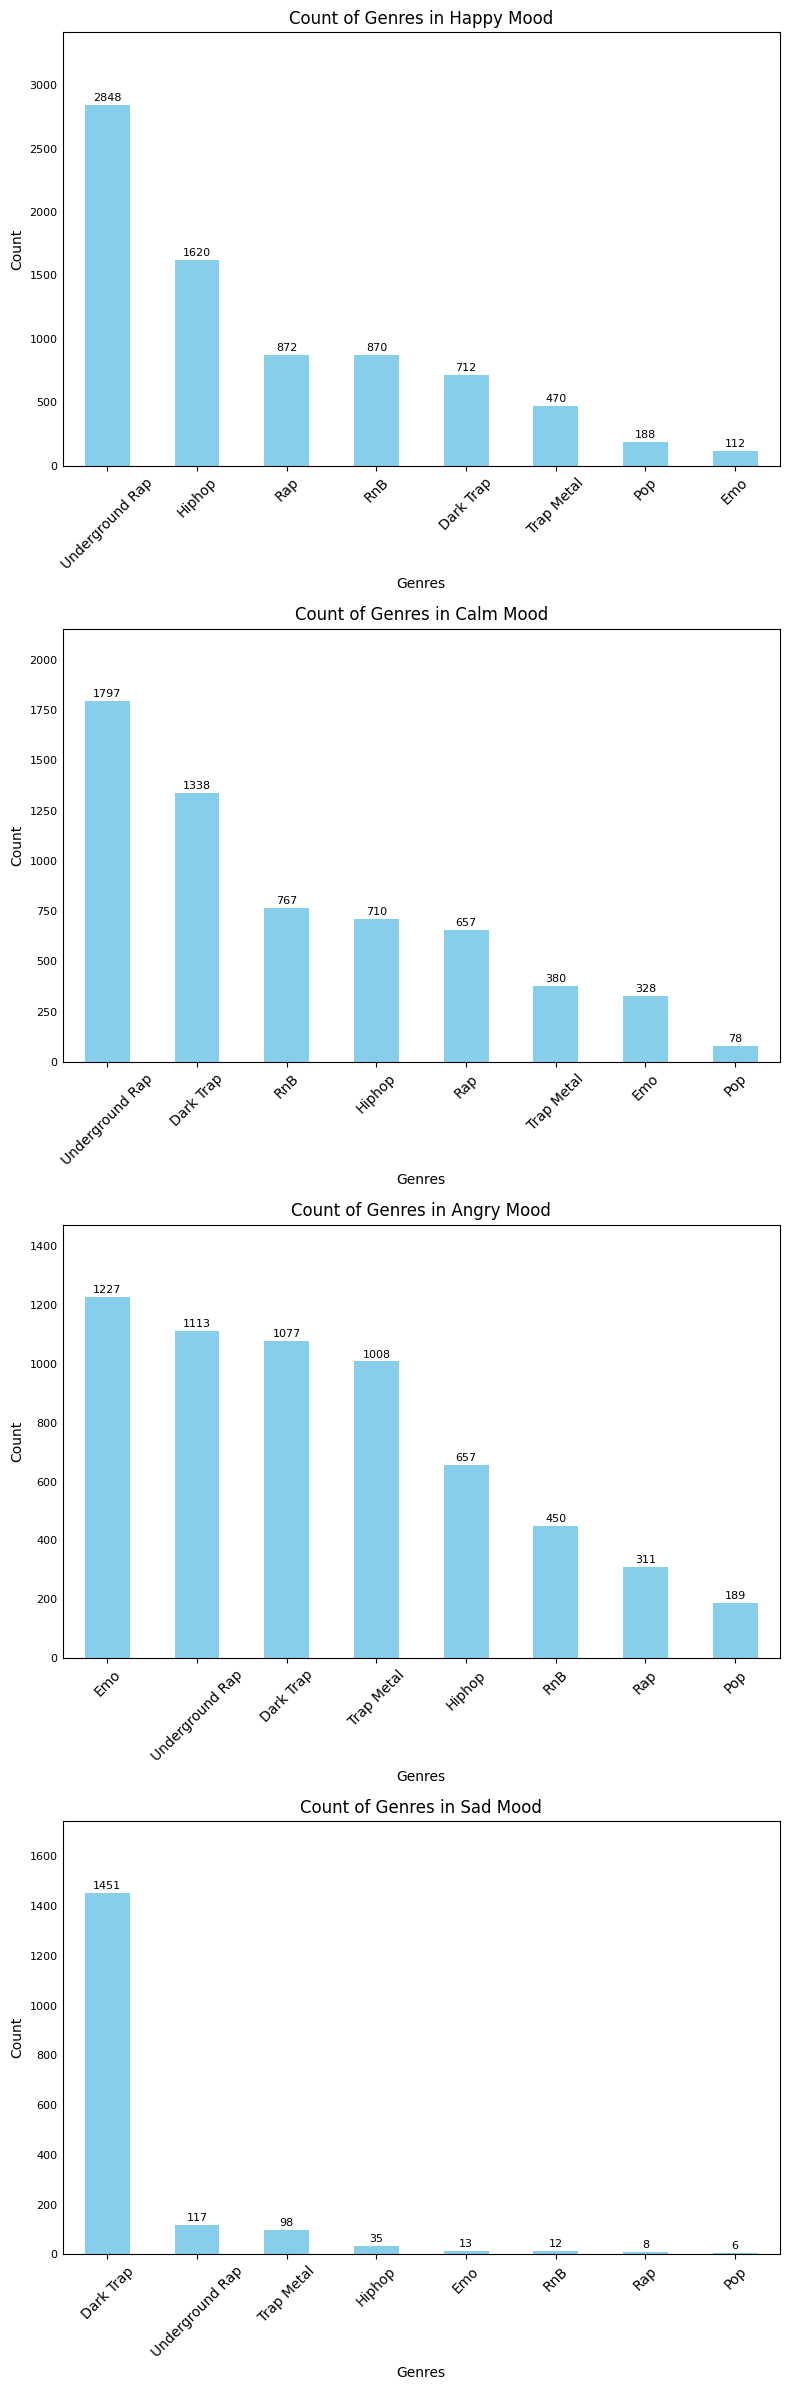

In [24]:
# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Create subplots for each mood
fig, axes = plt.subplots(nrows=len(unique_moods), figsize=(8, 6 * len(unique_moods)))

for i, mood in enumerate(unique_moods):
    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()
    genre_counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Count of Genres in {mood} Mood')
    axes[i].set_xlabel('Genres')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=8)  # Adjust y-axis label size
    axes[i].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
    axes[i].set_ylim(0, genre_counts.max() * 1.2)  # Set y-axis limit for better visibility

    for bar in axes[i].patches:
        axes[i].annotate(format(bar.get_height(), '.0f'), 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha='center', va='center', xytext=(0, 5), 
                         textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 10px;">

**3. Percentage (of total number of songs in each genre) of songs of genres in each mood**

</div>

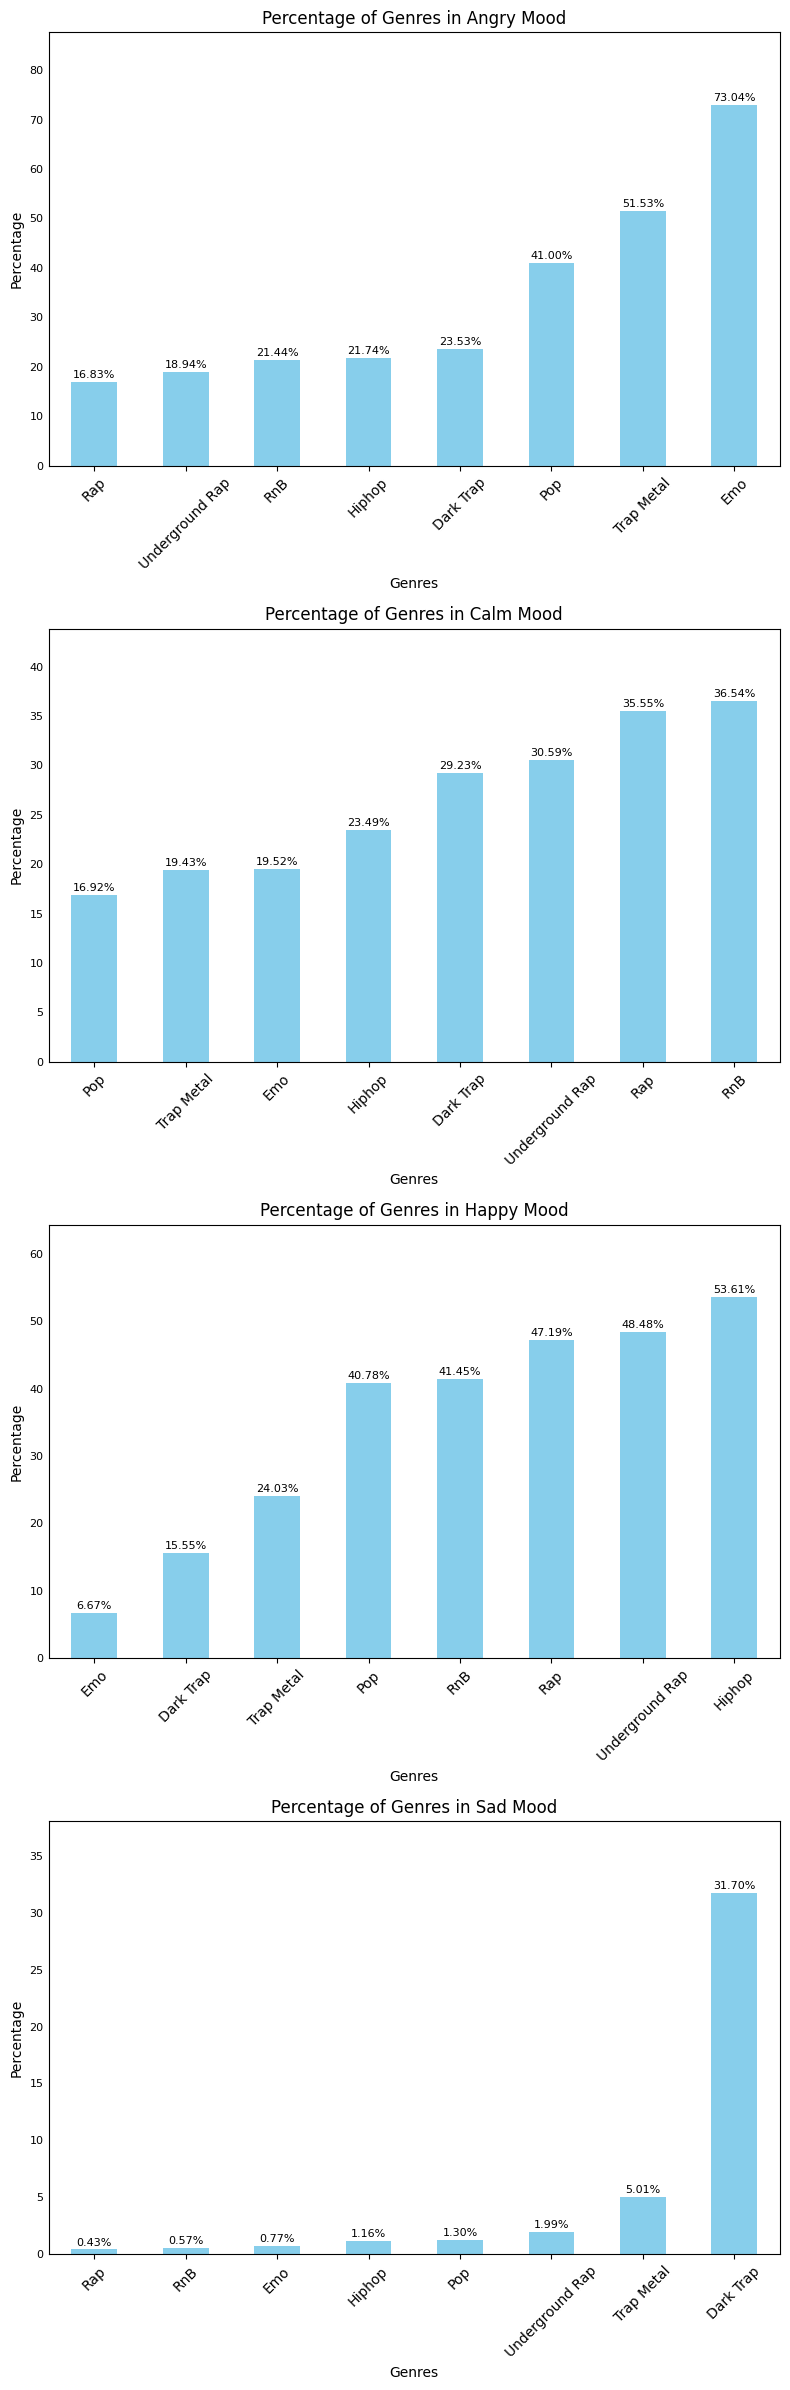

In [25]:
# Calculate total count of each genre across all moods
total_genre_counts = filtered_df_pca['genre'].value_counts()

# Create subplots for each mood
fig, axes = plt.subplots(nrows=len(filtered_df_pca['mood'].unique()), figsize=(8, 6 * len(filtered_df_pca['mood'].unique())))

for i, (mood, mood_data) in enumerate(filtered_df_pca.groupby('mood')):
    genre_counts = mood_data['genre'].value_counts()
    genre_percentages = (genre_counts / total_genre_counts) * 100
    sorted_percentages = genre_percentages.sort_values(ascending=True)  # Sort percentages in ascending order
    sorted_percentages.plot(kind='bar', ax=axes[i], color='skyblue')
    
    axes[i].set_title(f'Percentage of Genres in {mood} Mood')
    axes[i].set_xlabel('Genres')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].tick_params(axis='y', which='both', length=0)
    axes[i].set_ylim(0, sorted_percentages.max() * 1.2)

    for bar in axes[i].patches:
        axes[i].annotate(f'{bar.get_height():.2f}%', 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha='center', va='center', xytext=(0, 5), 
                         textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 10px;">

**Recommending a song on the basis of user choice and mood using content based filtering technique**

</div>

In [26]:
#Suggest 5 random songs based on mood detected

# Detected mood
detected_mood = np.random.choice(['Happy','Sad','Angry','Calm']) # Replace this with the actual detected mood

# Filter DataFrame based on detected mood
filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]

# Select 5 random songs from the filtered DataFrame
random_songs = filtered_by_mood.sample(5)['song_name']

print("Detected mood is:", detected_mood)
print("Random songs based on detected mood:")
print(random_songs)

Detected mood is: Sad
Random songs based on detected mood:
3784     Neon Looks
515         Ballgag
2477         Misery
3476    Flowerdance
2656     Crypt Walk
Name: song_name, dtype: object


In [27]:
filtered_by_mood = filtered_by_mood.drop_duplicates(subset=['song_name'])

In [28]:
filtered_by_mood

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
33,-1.377352,-0.752649,-0.039244,-1.944745,-1.182453,-0.942598,-0.150074,2.981646,-0.464638,-0.592141,-1.080481,spotify:track:2Tu4kHEeIVFn6Re2ybm2lQ,Dark Trap,OhNo!,0,Sad
46,-1.295808,-1.890855,-1.122260,-0.422301,0.845700,0.475868,-0.250820,2.945398,-0.570271,-1.620373,1.362722,spotify:track:2Iwf4sAnEgkuxxnJ61du8z,Dark Trap,Claustrophobia,0,Sad
51,-0.041290,-1.014437,1.314528,-0.096825,-1.182453,-0.956108,-0.508921,1.504515,-0.497648,-1.349515,0.365150,spotify:track:1NJel5c5LSc9Ac7UAeoJtp,Dark Trap,Centipede,0,Sad
72,0.667513,-0.934762,-1.122260,-0.209675,0.845700,-0.894961,-0.458548,2.311047,-0.477842,-1.622084,2.077833,spotify:track:0kCfKToIFZFQQAaSQHcjRL,Dark Trap,LTE,0,Sad
77,0.849418,-0.758340,-0.039244,0.115113,0.845700,-0.952553,-0.589518,2.891025,-0.596679,-1.122731,-1.011256,spotify:track:7EnGzsqQi0bAVGQw8i4WIQ,Dark Trap,A Death In The Ocean Would Be Beautiful,0,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20700,-0.097743,0.385557,1.043773,-0.112996,0.845700,-0.592781,-0.790434,2.487759,-0.108129,-0.382472,1.663991,spotify:track:6pxHmD7DAg5FFkdz9xjSrr,Hiphop,Mustang Nismo,0,Sad
20758,-0.957088,1.313194,1.043773,1.255999,0.845700,-1.027209,-0.801050,2.066368,-0.444832,-0.711951,1.185557,spotify:track:701NdqLvDIGs1DFXL9m2UY,Hiphop,The Anthem - Instrumental,0,Sad
21104,0.498153,-0.035580,0.502265,-0.369661,0.845700,-0.845901,-0.636532,2.079962,1.766848,0.507549,0.976062,spotify:track:5Ub65lHOysyiaNEw0l1fkm,Hiphop,Blue Bird,0,Sad
21483,-0.662277,-0.012815,-1.122260,0.455039,-1.182453,-1.017255,-0.797822,2.270267,-0.530659,0.922608,0.978053,spotify:track:3WibcMTQmEomwQEbYvYkFk,Hiphop,Deep Inside,0,Sad


In [31]:
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics.pairwise import cosine_similarity

# Initialize top_recommendation_uri as a global variable
top_recommendation_uri = None

# Create a dropdown widget for song selection
song_dropdown = widgets.Dropdown(
    options=random_songs,
    description='Select a song:'
)

# Display the dropdown widget
display(song_dropdown)

# Function to handle song selection
def on_song_selection(change):
    global top_recommendation_uri  # Declare top_recommendation_uri as a global variable

    selected_song = change.new
    print(f"You selected: {selected_song}")

    # Check if the user-selected song is in the filtered DataFrame
    if selected_song in filtered_by_mood['song_name'].values:
        selected_song_features = filtered_by_mood.loc[filtered_by_mood['song_name'] == selected_song, ['energy', 'valence']].values.flatten()
        all_songs_features = filtered_by_mood[['energy', 'valence']].values

        similarities = cosine_similarity([selected_song_features], all_songs_features)
        result_df = pd.DataFrame({'song_name': filtered_by_mood['song_name'], 'similarity': similarities.flatten(),'uri':filtered_by_mood['uri']})
        result_df = result_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)
        result_df = result_df[result_df['song_name'] != selected_song]
        top_3_recommendations = result_df.head(3)

        print("Top 3 recommendations based on energy and valence:")
        print(top_3_recommendations[['song_name', 'similarity']])

        # Fetching URI of the top recommendation
        top_recommendation_uri = top_3_recommendations.loc[result_df.iloc[0].name, 'uri']
        print(f"URI of top recommendation: {top_recommendation_uri}")

# Registering the function to observe changes in the dropdown value
song_dropdown.observe(on_song_selection, names='value')

# Now you can access top_recommendation_uri outside the function
print(top_recommendation_uri)


Dropdown(description='Select a song:', options=('Neon Looks', 'Ballgag', 'Misery', 'Flowerdance', 'Crypt Walk'…

None


<div style="background-color: lightgray; padding: 10px;">

**Play the top recommended song from Spotify**

</div>

In [32]:
import spotipy
import os
import time
from spotipy.oauth2 import SpotifyOAuth

os.system("open /Applications/Spotify.app")
time.sleep(4)

# Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', and 'YOUR_REDIRECT_URI' with your actual Spotify credentials
client_id = 'e9c2ca587e9a49d68e0e7239facaf237'
client_secret = '92ab877118ba4e58859d6747f64e30cd'
redirect_uri = 'http://localhost:8888/callback'  # Make sure this matches your Spotify app settings

# Set up the Spotify OAuth object with user authentication
scope = 'user-modify-playback-state user-read-playback-state'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

# Get the list of user's available devices
devices = sp.devices()
device_id = None

# Check if there are available devices
if devices['devices']:
    device_id = devices['devices'][0]['id']  # Use the first available device

# Replace 'YOUR_TRACK_URI' with the Spotify URI of the track you want to play
track_uri = 'top_recommendation_uri'

# Start playback of the specified track with the selected device
sp.start_playback(device_id=device_id, uris=[top_recommendation_uri])
